In [2]:
import pandas as pd
import numpy as np
import re
import sys
from tqdm.notebook import tqdm
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

In [ ]:
# 저장된 피클 파일을 불러오기
with open('c.pkl', 'rb') as file:
    df = pickle.load(file)
df

In [5]:
print(df.shape, df.columns)
corpus = df['morphs'].to_list()
print(len(corpus))
# df


(2431, 4) Index(['str', 'idx', 'morphs', 'pos_tag'], dtype='object')
2431


In [55]:
df

,str,idx,morphs,pos_tag
0,7월 개봉 예정 영화 신작 영화추천 신작 영화 추천 극장 개봉 예정 영화 7월 리부...,0,"[7월, 개봉, 예정, 영화, 신작, 영화, 추천, 신작, 영화, 추천, 극장, 개...","[(7월, Number), (개봉, Noun), (예정, Noun), (영화, No..."
1,문제는 쥬라기 월드 탑건 신비한 동물사전 레전드 영화의 리부트가 연일 관객들의 기대...,0,"[문제, 는, 쥬라기, 월드, 탑건, 신비한, 동물, 사전, 레전드, 영화, 의, ...","[(문제, Noun), (는, Josa), (쥬라기, Noun), (월드, Noun..."
2,어린 시절의 향수를 진하게 불러주는 오마주는 반갑지만 그때 느꼈던 감동과 재미는 다...,0,"[어린, 시절, 의, 향수, 를, 진하게, 불러주는, 오마주, 는, 반갑지만, 그때...","[(어리다, Verb), (시절, Noun), (의, Josa), (향수, Noun..."
3,저야 극장에서 보는 어지간한 영화는 재밌게 보고 나오는 편입니다만 그래서 극장 관람...,0,"[저, 야, 극장, 에서, 보는, 어지간한, 영화, 는, 재밌게, 보고, 나오는, ...","[(저, Noun), (야, Josa), (극장, Noun), (에서, Josa),..."
4,그래서 2차 3차 가공해서 영화를 해석하고 추천하는 글을 쓰는 데는 생각이 참 많아...,0,"[그래서, 2, 차, 3, 차, 가공, 해서, 영화, 를, 해석, 하고, 추천, 하...","[(그래서, Adverb), (2, Number), (차, Noun), (3, Nu..."
...,...,...,...,...
2426,왜냐하면 저 위로 올라가야하는데 아이혼자 클라이밍으로 올라가서 높은 곳을 걸어야하거든요,49,"[왜냐하면, 저, 위로, 올라가야하는데, 아이, 혼자, 클라, 이, 밍, 으로, 올...","[(왜냐하면, Adverb), (저, Noun), (위로, Noun), (올라가다,..."
2427,저희 아이는 1시간동안 땀이 뻘뻘 나도록 미끄럼틀을 오르내렸어요,49,"[저희, 아이, 는, 1시간, 동안, 땀, 이, 뻘뻘, 나도록, 미끄럼틀, 을, 오...","[(저희, Noun), (아이, Noun), (는, Josa), (1시간, Numb..."
2428,저 혹등고래 입속으로 들어가면 피노키오 인형이 있답니다,49,"[저, 혹등고래, 입속, 으로, 들어가면, 피노키오, 인형, 이, 있답니다]","[(저, Noun), (혹등고래, Noun), (입속, Noun), (으로, Jos..."
2429,두빛나래와 국립해양생물자원관은 장항에 위치해서 하루 여행 코스로 좋은 것 같아요,49,"[두, 빛, 나래, 와, 국립, 해, 양생, 물자원, 관, 은, 장항, 에, 위치,...","[(두, Determiner), (빛, Noun), (나래, Noun), (와, J..."


In [ ]:
# 저장된 피클 파일을 불러오기
with open('d.pkl', 'rb') as file:
    stopwords_df = pickle.load(file)
stopwords_df

In [8]:
stopwords = stopwords_df['josa'].to_list()
print(len(stopwords), stopwords[:10])

181 ['을', '이', '에', '의', '를', '가', '은', '으로', '는', '에서']


# networkx로 중심성 구하기

In [9]:
import networkx as nx
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [10]:
# 저장된 피클 파일을 불러오기
with open('e.pkl', 'rb') as file:
    c_comatx = pickle.load(file)
c_comatx

,단지,마을,것,수,차,그,이,때,곳,사람,...,전시,다른,파크,제,서울,이름,하나,개,가장,시작
단지,0.0,20.0,1.0,7.0,19.0,9.0,16.0,0.0,1.0,0.0,...,0.0,0.0,18.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0
마을,20.0,0.0,4.0,10.0,19.0,7.0,24.0,0.0,1.0,0.0,...,0.0,0.0,17.0,10.0,0.0,0.0,1.0,1.0,1.0,0.0
것,1.0,4.0,0.0,66.0,1.0,41.0,202.0,32.0,20.0,30.0,...,6.0,19.0,1.0,15.0,11.0,6.0,14.0,5.0,10.0,12.0
수,7.0,10.0,66.0,0.0,16.0,39.0,186.0,16.0,26.0,27.0,...,8.0,20.0,7.0,20.0,13.0,6.0,10.0,9.0,8.0,9.0
차,19.0,19.0,1.0,16.0,0.0,10.0,30.0,1.0,2.0,3.0,...,0.0,2.0,15.0,12.0,1.0,0.0,1.0,3.0,1.0,0.0
그,9.0,7.0,41.0,39.0,10.0,0.0,122.0,23.0,15.0,20.0,...,9.0,8.0,9.0,11.0,5.0,9.0,12.0,6.0,15.0,10.0
이,16.0,24.0,202.0,186.0,30.0,122.0,0.0,91.0,97.0,97.0,...,26.0,47.0,16.0,55.0,20.0,42.0,35.0,39.0,34.0,38.0
때,0.0,0.0,32.0,16.0,1.0,23.0,91.0,0.0,11.0,18.0,...,0.0,6.0,2.0,11.0,6.0,12.0,4.0,2.0,7.0,14.0
곳,1.0,1.0,20.0,26.0,2.0,15.0,97.0,11.0,0.0,16.0,...,5.0,4.0,0.0,6.0,10.0,7.0,7.0,4.0,8.0,1.0
사람,0.0,0.0,30.0,27.0,3.0,20.0,97.0,18.0,16.0,0.0,...,3.0,13.0,1.0,5.0,2.0,8.0,6.0,3.0,6.0,12.0


In [11]:
c_comatx_array = c_comatx.to_numpy()
print(type(c_comatx_array), c_comatx_array.shape)
c_comatx_array


<class 'numpy.ndarray'> (50, 50)


array([[ 0., 20.,  1., ...,  1.,  0.,  0.],
       [20.,  0.,  4., ...,  1.,  1.,  0.],
       [ 1.,  4.,  0., ...,  5., 10., 12.],
       ...,
       [ 1.,  1.,  5., ...,  0.,  3.,  1.],
       [ 0.,  1., 10., ...,  3.,  0.,  1.],
       [ 0.,  0., 12., ...,  1.,  1.,  0.]])

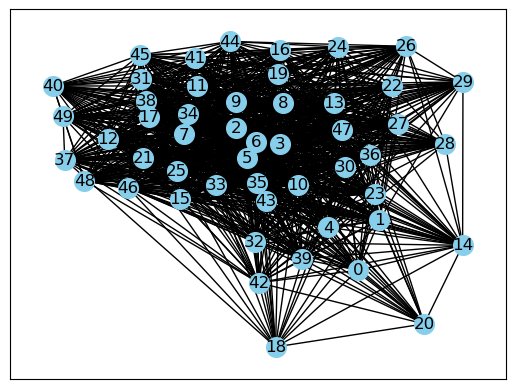

In [64]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# NetworkX 그래프 생성
G = nx.Graph()

# 노드 추가
for i in range(50):
    G.add_node(i)

# 엣지 추가 (동시출현 빈도 행렬을 기반으로)
for i in range(50):
    for j in range(i + 1, 50):  # 중복된 엣지를 피하기 위해
        weight = c_comatx_array[i, j]
        if weight > 0:
            G.add_edge(i, j, weight=weight)

# 그래프 시각화
pos = nx.spring_layout(G)  # 그래프 레이아웃 설정
labels = {i: str(i) for i in range(50)}  # 노드 라벨 설정
edge_labels = {(i, j): c_comatx_array[i, j] for i, j, _ in G.edges(data=True)}  # 엣지 라벨 설정

# 그래프 시각화
nx.draw_networkx(G, pos, with_labels=True, labels=labels, node_color='skyblue', node_size=200)
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()


In [257]:
import networkx as nx
from pyvis.network import Network
import numpy as np
import random
import matplotlib.pyplot as plt

def visualize_network_with_pyvis(co_occurrence_matrix, node_labels):
    # NetworkX 그래프 생성
    G = nx.Graph()

    # 노드 추가
    for i in range(len(node_labels)):
        G.add_node(i, title=node_labels[i])

    edge_list = []
    # 엣지 추가 (동시출현 빈도 행렬을 기반으로)
    for i in range(50):
        for j in range(i + 1, 50):  # 중복된 엣지를 피하기 위해
            weight = co_occurrence_matrix[i, j]
            if weight > 0:
                edge_list.append(int(weight))
                G.add_edge(i, j, weight=weight)
    edge_list = list(set(edge_list))           
    edge_list.sort()
            
    # pyvis 그래프 생성
    nt = Network(directed = False, height="900px", width="70%")
    
    # 그래프의 물리학적 시뮬레이션을 비활성화
    nt.barnes_hut(gravity=-8000, central_gravity=0.6, spring_length=200, spring_strength=0.001, damping=0.09, overlap=0)
    
    # 랜덤 색상 리스트 생성
    color_list = ['#{:02x}{:02x}{:02x}'.format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(node_labels))]
    
    # 노드 추가 및 노드 라벨 설정 및 크기 조절
    for node_id, node_data in G.nodes(data=True):
        node_color = color_list[node_id]  # 서로 다른 색상 할당
        label = node_data['title']
        nt.add_node(node_id, label=label, color=node_color, size=70)  # 노드 라벨 설정 및 크기 조절

    # weight을 기반으로 엣지 클래스 할당, 구간 나눠서 엣지 색상 변경
    num_classes = 5  # 클래스 개수 (5개 구간으로 나누기)
    class_size = len(edge_list) / num_classes  # 각 클래스의 크기 계산
    color_classes = ['#BDBDBD', '#A4A4A4', '#848484', '#6E6E6E', '#585858']
    width_classes = [2, 4, 6, 8, 10]
    for edge in G.edges(data=True):
        source, target, data = edge
        weight = data.get("weight", 1)  # 기본 가중치 1
        # weight 값에 따라 클래스 지정 -> 클래스별 두께와 색상 설정 
        weight_class = round(edge_list.index(weight) // class_size)
        color = color_classes[weight_class]
        width = width_classes[weight_class]
        print(source, target, data)
        nt.add_edge(source, target, value=width_classes[weight_class], color=color, width=width)
    
    # 노드 라벨 위치 및 폰트 크기 조절을 위한 반복문
    #print(nt.nodes)
    for node_id in nt.nodes:
        nt.nodes[node_id['id']]['font'] = {'size': 70, 'bold': True, 'color': 'black'}
    nt.show_buttons(filter_=['physics'])
    
    # 그래프를 HTML 파일로 저장
    nt.show("interactive_graph.html")

In [ ]:
# 함수 호출
graph = visualize_network_with_pyvis(c_comatx_array, c_comatx.columns.tolist())

In [19]:
def draw_cengrality(graph, pos, centrality):
    values = centrality.values()
    norm = Normalize(vmin=min(values), vmax=max(values))
    node_color = [cm.summer(norm(c)) for name, c in centrality.items()]
    nx.draw_networkx(G, with_labels = True, pos=pos, node_color=node_color)


In [144]:
G

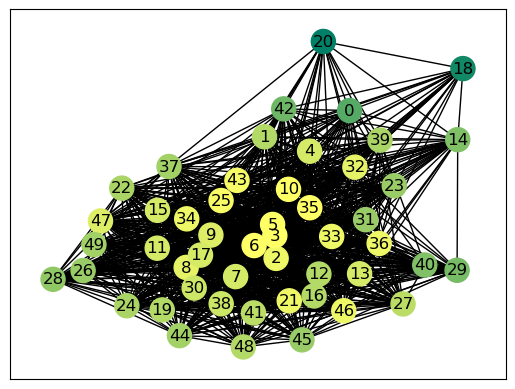

In [20]:
#### 차수 중심성
dc = nx.degree_centrality(G)
draw_cengrality(G, pos, dc)


# 카운트벡터로 중심성 구하기

In [21]:
cv = CountVectorizer(stop_words=stopwords, min_df=0.01, token_pattern=r'\w{1,}', binary=True)

In [24]:
corpus_j = [' '.join(i) for i in corpus]

In [25]:
dtm = cv.fit_transform(corpus_j)

In [26]:
cooccur = dtm.T @ dtm
adj_mtx = cooccur.A

In [27]:
adj_mtx.shape

(290, 290)

In [28]:
n = np.diag(adj_mtx)


In [29]:
total, _ = dtm.shape

In [34]:
lift = total * adj_mtx / np.outer(n, n)


In [36]:
m = np.where(lift >= 2, 1, 0)


In [37]:
np.fill_diagonal(m, 0)


In [38]:
import networkx as nx

In [39]:
net = nx.from_numpy_array(m)

In [40]:
words = cv.get_feature_names_out()
# net = nx.relabel_nodes(net, dict(enumerate(words)))
# net2 = nx.relabel_nodes(net)

In [ ]:
words


In [46]:
net

In [ ]:
list(nx.neighbors(net, '방문'))


In [47]:
%%time
# # 연결중심성(degree centrality): 연결된 단어 수 / (전체 단어 수 - 1)
# dc = nx.degree_centrality(net)

# 매개중심성(between centrality): 단어-단어 간의 최단 경로에 포함된 비율
bc = nx.betweenness_centrality(net)

# # 근접중심성(closeness centrality): 다른 단어와 거리가 평균적으로 짧은 단어
# cc = nx.closeness_centrality(net)

# # 고유벡터중심성(eigenvector centrality): 중요한 단어와 연결된 단어가 중요한 단어
# ec = nx.eigenvector_centrality(net)


CPU times: total: 1.47 s
Wall time: 1.51 s


In [49]:
# 중심성을 데이터 프레임으로 변환
ecf = pd.DataFrame(bc.items(), columns=['word', 'centrality'])


In [50]:
# 중심성 순으로 정렬
ecf.sort_values('centrality')


,word,centrality
95,95,0.000106
280,280,0.000299
23,23,0.000354
26,26,0.000384
99,99,0.000431
...,...,...
180,180,0.005784
140,140,0.005984
125,125,0.006079
197,197,0.006299


## 시각화

In [52]:
# pip install pyvis
from pyvis.network import Network
vis = Network(height='800px', width='1000px')
vis.from_nx(net)
vis.show_buttons(filter_=True)
vis.save_graph('nx.html')


In [54]:
vis.show('nx.html')